In [1]:
#Changing various mode-matches in the interferometer, how does it affect the QM limited sensitiviity?

###Output Images
#Strain vs Freq
#Modal Content of the the cavities
#Overlaps between the the changed cavities and the rest of the IFO

In [2]:
%matplotlib inline
import pykat
import pykat.optics.ABCD as abcd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np

### My functions
from kat_commands import *
from MMT import *
from cav_commands import *
from load_kat_data import *
import get_WS
import trace_mode

                                              ..-
    PyKat 1.0.17          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [3]:
### The kat file is an aLIGO IFO setup with a FC.
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4_modified.kat" 

In [4]:
#load the original kat file (ie Perfect Modematching) as a reference
basekat = pykat.finesse.kat() 
basekat.loadKatFile(katfile)
basekat.parseCommands(darm_commands)
basekat.parseCommands(amplitude_detectors)
basekat.parseCommands(quantum_detectors)
basekat.parseCommands(pds)
basekat.parseCommands(add_squeezing)
basekat.parseCommands("maxtem "+str(2))
basekat.undumpNodes() #undump the vacuum nodes to get the right quantum noise
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

freq = []

out_perfect_mm = kat.run()
freq.append(out_perfect_mm.x)

Parsing `qd qdA 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `qd qdP 0 90 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd02 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd00m 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd01m 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd02m 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00OFI 0 0 0 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01OFI 0 0 1 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd

In [5]:
SR3_Rc_orig = kat.SR3.Rc.value
SRMHR_Rc_orig = kat.SRMHR.Rc.value

In [6]:
SRCTL_q_perfect_x = out_perfect_mm["SRCoutx"] #q's coming out of the SRC @ the OFI
SRCTL_q_perfect_y = out_perfect_mm["SRCouty"]

SRMY_q_perfect_x = out_perfect_mm["SRMYqx"] #q's at the face of SRMHR
SRMY_q_perfect_y = out_perfect_mm["SRMYqy"]

In [7]:
f_overlap_SRC_to_ARM_x=[]
f_overlap_SRC_to_ARM_y=[]

f_overlap_OMC_to_ARM_x = []
f_overlap_OMC_to_ARM_y = []

In [8]:
#load the original kat file (ie Perfect Modematching) as a reference
basekat0 = pykat.finesse.kat() 
basekat0.loadKatFile(katfile)
basekat0.parseCommands(darm_commands)
basekat0.parseCommands(amplitude_detectors)
basekat0.parseCommands(quantum_detectors)
basekat0.parseCommands(pds)
basekat0.parseCommands("maxtem "+str(2))
basekat0.undumpNodes() #undump the vacuum nodes
kat0=basekat0.deepcopy() #copy kat code
kat0.verbose = False

out_perfect_mm_noSqz = kat0.run()

Parsing `qd qdA 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `qd qdP 0 90 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd02 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd00m 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd01m 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd02m 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00OFI 0 0 0 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01OFI 0 0 1 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd

In [9]:
max_offset_SR3 = .01634 #Roc change in SR3 curvature to get 5% mode mismatch

basekat5 = pykat.finesse.kat() 
basekat5.loadKatFile(katfile)
basekat5.parseCommands(darm_commands)
basekat5.parseCommands(amplitude_detectors)
basekat5.parseCommands(pds)
basekat5.parseCommands("maxtem "+str(2))
basekat5.parseCommands(quantum_detectors)
basekat5.undumpNodes() #undump the vacuum nodes
kat5=basekat5.deepcopy() #copy kat code
kat5.verbose = False

SR3_Rc_new = SR3_Rc_orig + max_offset_SR3
kat5.SR3.Rcx.value = SR3_Rc_new
kat5.SR3.Rcy.value = SR3_Rc_new

out_w_badMM_noSqz = kat5.run()

Parsing `qd qdA 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `qd qdP 0 90 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd02 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd00m 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd01m 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd02m 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00OFI 0 0 0 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01OFI 0 0 1 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd

In [10]:
###
### Extract the eigenmode of SRC with offsets in SR3
### This is used to build a modematching telescope to have an anti-lensing effect

get_OFI_qx_wrt_OMC_list=[]
get_OFI_qy_wrt_OMC_list=[]
get_SRM_qx_wrt_cavARM_list = []
get_SRM_qy_wrt_cavARM_list = []

#Add Commands
basekat1 = pykat.finesse.kat() 
basekat1.loadKatFile(katfile)
basekat1.parseCommands(darm_commands)
basekat1.parseCommands(add_squeezing)
basekat1.undumpNodes()
basekat1.parseCommands("maxtem "+str(2))
kat1=basekat1.deepcopy() 
kat1.verbose = False

# Change the SRMHR_Roc
SR3_Rc_new = SR3_Rc_orig + max_offset_SR3
kat1.SR3.Rcx.value = SR3_Rc_new
kat1.SR3.Rcy.value = SR3_Rc_new

#Run and extract the q's at the OFI and SRMHR
out_new_SR3_roc = kat1.run()
   
#### Extract the mode at the SRMAR w.r.t the ARM
for cav in kat1.getAll(pykat.commands.cavity):
    cav.enabled = False
kat1.cavXARM.enabled = True
kat1.cavYARM.enabled = True

get_SRM_q_wrt_cavARM = kat1.run(getTraceData=True)
get_SRM_qx_wrt_cavARM_list.append(get_SRM_q_wrt_cavARM[1][0]['nSRMARb'][0].q)
get_SRM_qy_wrt_cavARM_list.append(get_SRM_q_wrt_cavARM[1][0]['nSRMARb'][1].q)
    
    
#### Extract the mode at the OFI w.r.t the OMC
for cav in kat1.getAll(pykat.commands.cavity):
    cav.enabled = False
kat1.cavOMC.enabled = True
get_OFI_qx_wrt_OMC = kat1.run(getTraceData=True)

get_OFI_qx_wrt_OMC_list.append(-np.conjugate(get_OFI_qx_wrt_OMC[1][0]['nIBAin'][0].q))
get_OFI_qy_wrt_OMC_list.append(-np.conjugate(get_OFI_qx_wrt_OMC[1][0]['nIBAin'][1].q))

q_refin_x_list = get_SRM_qx_wrt_cavARM_list
q_refin_y_list = get_SRM_qy_wrt_cavARM_list

q_refout_x_list = get_OFI_qx_wrt_OMC_list
q_refout_y_list = get_OFI_qy_wrt_OMC_list

In [11]:
basekat1 = pykat.finesse.kat() 
basekat1.loadKatFile(katfile)
basekat1.parseCommands(darm_commands)
basekat1.parseCommands(amplitude_detectors)
basekat1.parseCommands(quantum_detectors)
basekat1.parseCommands(pds)
basekat1.parseCommands(add_squeezing)
basekat1.parseCommands("maxtem "+str(2))
basekat1.undumpNodes()

kat1=basekat1.deepcopy()
kat1.verbose = False
    
SR3_Rc = kat.SR3.Rc
dRc = max_offset_SR3
    
kat1.SR3.Rcx.value = SR3_Rc + dRc
kat1.SR3.Rcy.value = SR3_Rc + dRc

#
#    q1   d1   f1  d2   f2  d3   q2
#    |   <-->  |  <-->  | <-->  |
#    | <---------- D ---------> |
#

q1 = q_refin_x_list[0]
q2 = q_refout_x_list[0]
D  = 0.491516 # total distance from SRC to OFI
d1 = 0.25
d2 = 0.0001
d3 = D-d1-d2

[f1, f2] = modematch(q1, q2, d1, d2, d3)

kat1.lSRMTT1.L.value = d1
kat1.SRMTT1.f.value = f1
kat1.lSRMTT2.L.value = d2
kat1.SRMTT2.f.value = f2
kat1.lIBAin.L.value = d3

out1 = kat1.run()
kat1.saveScript("VarySR3_95MM_wSqz_MMTTon_maxtem2.kat")


#### Turn off all the cav commands except SRCY to extract the eigenmode at the BS
[srcx,srcy] = trace_mode.from_cav_to_BS(kat1,'cavSRY')

#### Turn off all the cav commands except YARM to extract the eigenmode at the BS
[ARMx,ARMy] = trace_mode.from_cav_to_BS(kat1,'cavXARM')

#### Turn off all the cav commands except OMC to extract the eigenmode at the BS
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat1,'cavOMC')

f_overlap_SRC_to_ARM_x.append(pykat.BeamParam.overlap(srcx,ARMx))
f_overlap_SRC_to_ARM_y.append(pykat.BeamParam.overlap(srcy,ARMy))

Parsing `qd qdA 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `qd qdP 0 90 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd02 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd00m 0 0 0 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd01m 0 0 1 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd* sd02m 0 0 2 nOMC_AROC_trans` into pykat object not implemented yet, added as extra line.
Parsing `sd sd00OFI 0 0 0 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd sd01OFI 0 0 1 nIMFC1` into pykat object not implemented yet, added as extra line.
Parsing `sd

In [12]:
###
###Extract the eigenmode of SRC with offsets in SRMHR
###

SRMRoc_offset = []
max_offset = .4661 #50cm Roc change in SRM curvature

get_OFI_qx_wrt_OMC_list=[]
get_OFI_qy_wrt_OMC_list=[]

get_SRM_qx_wrt_cavARM_list = []
get_SRM_qy_wrt_cavARM_list = []

#Add Commands
basekat2 = pykat.finesse.kat() 
basekat2.loadKatFile(katfile)
basekat2.parseCommands(darm_commands)
basekat2.parseCommands("maxtem "+str(2))
basekat2.parseCommands(add_squeezing)
basekat2.undumpNodes()
kat2=basekat2.deepcopy() 
kat2.verbose = False

# Change the SRMHR_Roc
SRMHR_Rc_new = SRMHR_Rc_orig + max_offset
kat2.SRMHR.Rcx.value = SRMHR_Rc_new
kat2.SRMHR.Rcy.value = SRMHR_Rc_new

#Run and extract the q's at the OFI and SRMHR
out_new_SRM_roc = kat2.run()

#### Extract the mode at the SRMAR w.r.t the ARM
for cav in kat2.getAll(pykat.commands.cavity):
    cav.enabled = False
kat2.cavXARM.enabled = True
kat2.cavYARM.enabled = True

get_SRM_q_wrt_cavARM = kat2.run(getTraceData=True)
get_SRM_qx_wrt_cavARM_list.append(get_SRM_q_wrt_cavARM[1][0]['nSRMARb'][0].q)
get_SRM_qy_wrt_cavARM_list.append(get_SRM_q_wrt_cavARM[1][0]['nSRMARb'][1].q)


#### Extract the mode at the OFI w.r.t the OMC
for cav in kat2.getAll(pykat.commands.cavity):
    cav.enabled = False
kat2.cavOMC.enabled = True
get_OFI_qx_wrt_OMC = kat2.run(getTraceData=True)
get_OFI_qx_wrt_OMC_list.append(-np.conjugate(get_OFI_qx_wrt_OMC[1][0]['nIBAin'][0].q))
get_OFI_qy_wrt_OMC_list.append(-np.conjugate(get_OFI_qx_wrt_OMC[1][0]['nIBAin'][1].q))


q_refin_x_list = get_SRM_qx_wrt_cavARM_list
q_refin_y_list = get_SRM_qy_wrt_cavARM_list

q_refout_x_list = get_OFI_qx_wrt_OMC_list
q_refout_y_list = get_OFI_qy_wrt_OMC_list

In [13]:
# We use the q_in and q_out to create an anti-lensing effect with a telescoping array between
# the SRM and OFI

basekat2 = pykat.finesse.kat() 
basekat2.loadKatFile(katfile)
basekat2.parseCommands(darm_commands)
basekat2.parseCommands(amplitude_detectors)
basekat2.parseCommands("maxtem "+str(2))
basekat2.parseCommands(pds)
basekat2.parseCommands(add_squeezing)
basekat2.undumpNodes()
kat2=basekat2.deepcopy()
kat2.verbose = False


SRMHR_Rc = kat.SRMHR.Rc
dRc = max_offset
print(dRc)
kat2.SRMHR.Rcx.value = SRMHR_Rc + dRc
kat2.SRMHR.Rcy.value = SRMHR_Rc + dRc

#
#    q1   d1   f1  d2   f2  d3   q2
#    |   <-->  |  <-->  | <-->  |
#    | <---------- D ---------> |
#

q1 = q_refin_x_list[0]
q2 = q_refout_x_list[0]
D  = 0.491516 # total distance from SRC to OFI
d1 = 0.25
d2 = 0.0001
d3 = D-d1-d2

[f1, f2] = modematch(q1, q2, d1, d2, d3)

kat2.lSRMTT1.L.value = d1
kat2.SRMTT1.f.value = f1
kat2.lSRMTT2.L.value = d2
kat2.SRMTT2.f.value = f2
kat2.lIBAin.L.value = d3

out2 = kat2.run()
kat2.saveScript("VarySRM_95MM_wSqz_MMTTon_maxtem2.kat")

#### Turn off all the cav commands except SRCY to extract the eigenmode at the BS
[srcx,srcy] = trace_mode.from_cav_to_BS(kat2,'cavSRY')

#### Turn off all the cav commands except YARM to extract the eigenmode at the BS
[ARMx,ARMy] = trace_mode.from_cav_to_BS(kat2,'cavXARM')

#### Turn off all the cav commands except OMC to extract the eigenmode at the BS
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat2,'cavOMC')

f_overlap_SRC_to_ARM_x.append(pykat.BeamParam.overlap(srcx,ARMx))
f_overlap_SRC_to_ARM_y.append(pykat.BeamParam.overlap(srcy,ARMy))

0.4661
Successfully Mode-Matched! >99.9% overlap
f1 is -0.049162843193602715
f2 is 0.04928017977955772


In [14]:
f_overlap_SRC_to_ARM_x

[0.9500514484454374, 0.9500002660761544]

In [28]:
#Add Commands
basekat3 = pykat.finesse.kat() 
basekat3.loadKatFile(katfile)
basekat3.parseCommands(darm_commands)
basekat3.parseCommands(amplitude_detectors)
basekat3.parseCommands(pds)
basekat3.parseCommands(add_squeezing)
basekat3.parseCommands("maxtem "+str(2))
basekat3.undumpNodes()
kat3=basekat3.deepcopy() 
kat3.verbose = False

# Change the FC End ROC to get 95% matching to the rest of the ifo 
kat3.EMFC.Rcx.value = 15.999-.00151
kat3.EMFC.Rcy.value = 15.999-.00151

#Run and extract the q's at the OFI and SRMHR
out_new3 = kat3.run()
kat3.saveScript("VaryFC_95MM_wSqz_MMTTon_maxtem2.kat")

#### Turn off all the cav commands except SRCY to extract the eigenmode at the BS
[srcx,srcy] = trace_mode.from_cav_to_BS(kat3,'cavSRY')

#### Turn off all the cav commands except YARM to extract the eigenmode at the BS
[ARMx,ARMy] = trace_mode.from_cav_to_BS(kat3,'cavXARM')

#### Turn off all the cav commands except OMC to extract the eigenmode at the BS
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat3,'cavOMC')

#### Turn off all the cav commands except FC to extract the eigenmode at the BS
[FCx,FCy] = trace_mode.from_cav_to_BS(kat3,'cavFC')

In [29]:
print(pykat.BeamParam.overlap(srcx,ARMx))
print(pykat.BeamParam.overlap(srcy,ARMy))

print(pykat.BeamParam.overlap(OMCx,ARMx))
print(pykat.BeamParam.overlap(OMCy,ARMy))

print(pykat.BeamParam.overlap(FCx,ARMx))
print(pykat.BeamParam.overlap(FCy,ARMy))

0.9999999978510681
0.9970292046622555
0.9999999156282784
0.9982612954091425
0.95005910203725
0.9624131715229953


In [19]:
#load the original kat file (ie Perfect Modematching) as a reference
basekat_nosqz = pykat.finesse.kat() 
basekat_nosqz.loadKatFile(katfile)
basekat_nosqz.parseCommands(darm_commands)
basekat_nosqz.parseCommands(amplitude_detectors)
basekat_nosqz.parseCommands(pds)
basekat_nosqz.parseCommands("maxtem "+str(2))
basekat_nosqz.undumpNodes() #undump the vacuum nodes
kat_nosqz=basekat_nosqz.deepcopy() #copy kat code
kat_nosqz.verbose = False

out_perfect_mm_nosqz = kat_nosqz.run()

In [30]:
###Mismatch the FC
#Add Commands
basekat4 = pykat.finesse.kat() 
basekat4.loadKatFile(katfile)
basekat4.parseCommands(darm_commands)
basekat4.parseCommands(amplitude_detectors)
basekat4.parseCommands(pds)
basekat4.parseCommands(add_squeezing)
basekat4.parseCommands("maxtem "+str(2))
basekat4.undumpNodes()
kat4=basekat4.deepcopy() 
kat4.verbose = False

# Change the SRMTT f 
kat4.SRMTT1.f.value = 26.85

#Run and extract the q's at the OFI and SRMHR
out_new4 = kat4.run()
kat4.saveScript("VaryMMTT_95MM_wSqz_MMTTon_maxtem2.kat")


In [ ]:
"""varyMMT_data_maxtem6 = np.loadtxt('./HigherOrderSims/VaryMMTT_95MM_wSqz_MMTTon_maxtem6.out',comments='%')
varyMMT_data_maxtem6_freq,varyMMT_data_maxtex6_darm= load(varyMMT_data_maxtem6)

varyMMT_data_maxtem8 = np.loadtxt('./HigherOrderSims/VaryMMTT_95MM_wSqz_MMTTon_maxtem8.out',comments='%')
varyMMT_data_maxtem8_freq,varyMMT_data_maxtex8_darm= load(varyMMT_data_maxtem8)

varyMMT_data_maxtem10 = np.loadtxt('./HigherOrderSims/VaryMMTT_95MM_wSqz_MMTTon_maxtem10.out',comments='%')
varyMMT_data_maxtem10_freq,varyMMT_data_maxtex10_darm= load(varyMMT_data_maxtem10)

varySRM_data_maxtem6 = np.loadtxt('./HigherOrderSims/VarySRM_95MM_wSqz_MMTTon_maxtem6.out',comments='%')
varySRM_data_maxtem6_freq,varySRM_data_maxtex6_darm= load(varySRM_data_maxtem6)

varySRM_data_maxtem8 = np.loadtxt('./HigherOrderSims/VarySRM_95MM_wSqz_MMTTon_maxtem8.out',comments='%')
varySRM_data_maxtem8_freq,varySRM_data_maxtex8_darm= load(varySRM_data_maxtem8)

varySRM_data_maxtem10 = np.loadtxt('./HigherOrderSims/VarySRM_95MM_wSqz_MMTTon_maxtem10.out',comments='%')
varySRM_data_maxtem10_freq,varySRM_data_maxtex10_darm= load(varySRM_data_maxtem10)

varySR3_data_maxtem6 = np.loadtxt('./HigherOrderSims/VarySR3_95MM_wSqz_MMTTon_maxtem6.out',comments='%')
varySR3_data_maxtem6_freq,varySR3_data_maxtex6_darm= load(varySR3_data_maxtem6)

varySR3_data_maxtem8 = np.loadtxt('./HigherOrderSims/VarySR3_95MM_wSqz_MMTTon_maxtem8.out',comments='%')
varySR3_data_maxtem8_freq,varySR3_data_maxtex8_darm= load(varySR3_data_maxtem8)

varySR3_data_maxtem10 = np.loadtxt('./HigherOrderSims/VarySR3_95MM_wSqz_MMTTon_maxtem10.out',comments='%')
varySR3_data_maxtem10_freq,varySR3_data_maxtex10_darm= load(varySR3_data_maxtem10)

pl.figure(figsize=(18, 10), dpi=80)


pl.subplot(111)
pl.loglog(freq[0], np.real(out_perfect_mm['NSR_with_RP']),linewidth=3, label='Perfect')
#pl.loglog(freq[0], np.real(darm_dict['Varying SR3 to 95% MM']),linewidth=3,label='Varying SR3 to 95% MM maxtem4')
pl.loglog(varySR3_data_maxtem6_freq, varySR3_data_maxtex6_darm,linewidth=3,label='Varying SR3 to 95% MM maxtem6')
pl.loglog(varySR3_data_maxtem8_freq, varySR3_data_maxtex8_darm,linewidth=3,label='Varying SR3 to 95% MM maxtem8')
pl.loglog(varySR3_data_maxtem10_freq, varySR3_data_maxtex10_darm,linewidth=3,label='Varying SR3 to 95% MM maxtem10')


#pl.loglog(freq[0], np.real(darm_dict['Varying SRM to 95% MM']),'o-',linewidth=1,label='Varying SRM to 95% MM maxtem4')
pl.loglog(varySRM_data_maxtem6_freq, varySRM_data_maxtex6_darm,'4-',linewidth=3,\
          markersize=15,label='Varying SRM to 95% MM maxtem6')
pl.loglog(varySRM_data_maxtem8_freq, varySRM_data_maxtex8_darm,'4-',linewidth=3,\
          markersize=15,label='Varying SRM to 95% MM maxtem8')
pl.loglog(varySRM_data_maxtem10_freq, varySRM_data_maxtex10_darm,'4-',linewidth=3,\
          markersize=15,label='Varying SRM to 95% MM maxtem10')


#pl.loglog(freq[0], np.real(darm_dict['Varying MMT to 95% MM(between OMC and Arms)']),linewidth=3\
#          ,label='Varying MMT to 95% MM(between OMC and Arms)')


#pl.title("QN-Limited Varying SR3 w/10Db Sqz",fontsize=30)
pl.xlim(freq[0].min(),freq[0].max())
pl.ylim(7e-25,1e-22)

pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.savefig("ht_varyingCompareSR3SRMmaxTEM_wSqz.png")

pl.show()""";

/home/thomasvo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


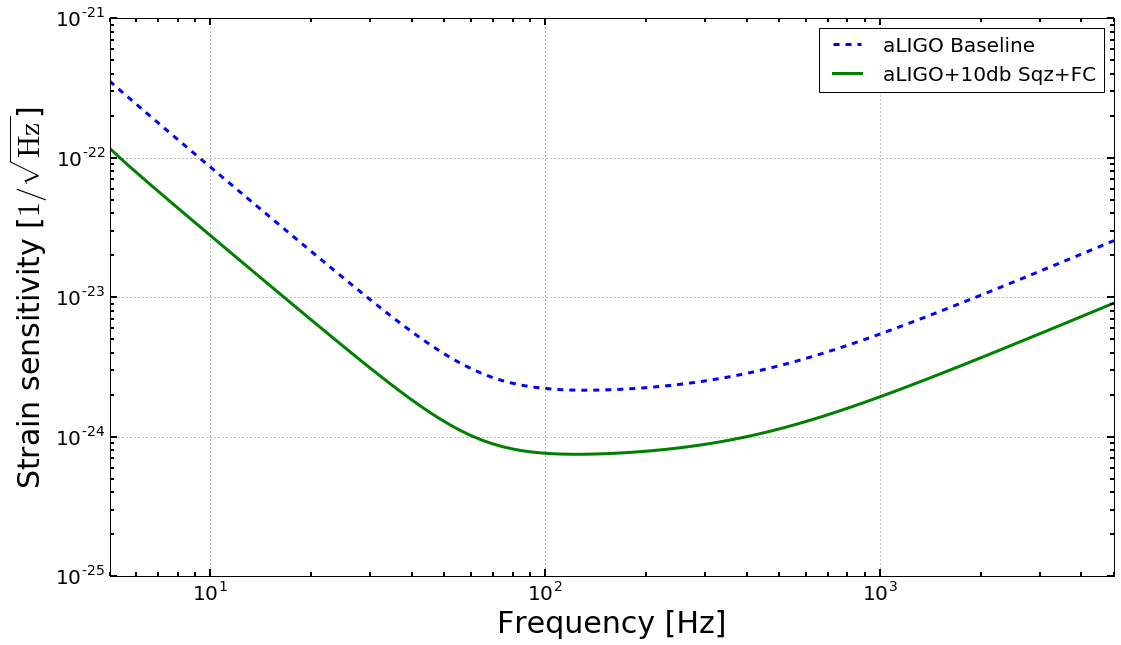

In [32]:
pl.figure(figsize=(18, 10), dpi=80)


pl.subplot(111)

pl.loglog(freq[0], out_perfect_mm_nosqz['NSR_with_RP'],'--',linewidth=3, label='aLIGO Baseline')
pl.loglog(freq[0], np.real(out_perfect_mm['NSR_with_RP']),linewidth=3, label='aLIGO+10db Sqz+FC')

pl.xlim(freq[0].min(),freq[0].max())
#pl.ylim(3e-25,1e-22)

pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.savefig("ht_varyingCompare_SqzNoSqz.png")

pl.show()

/home/thomasvo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


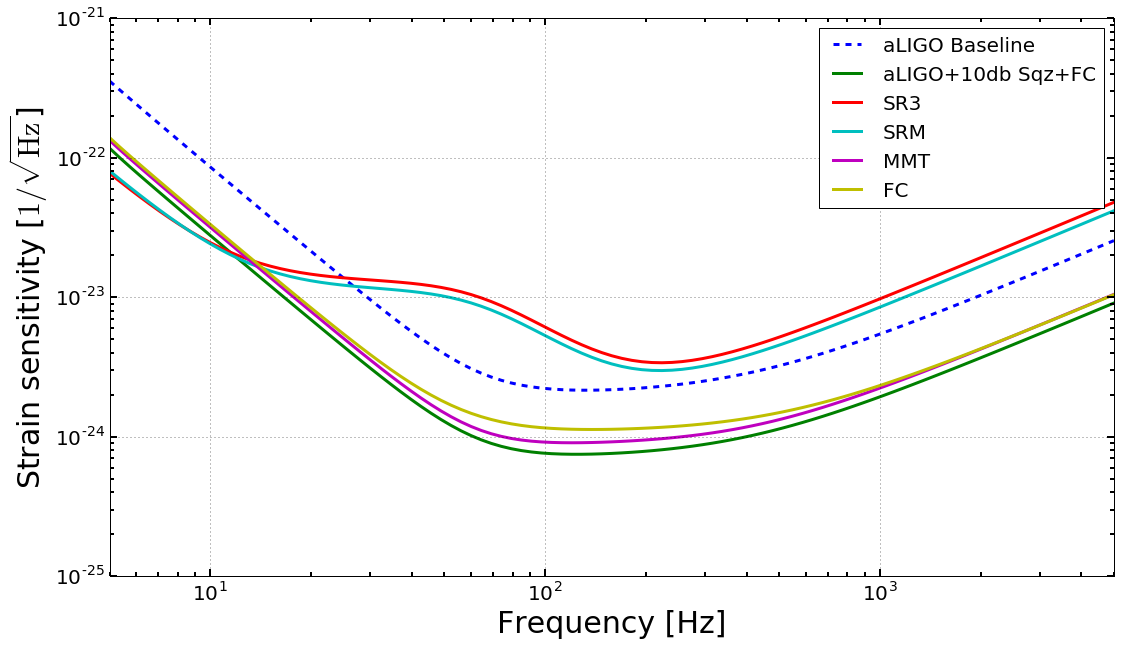

In [39]:
pl.figure(figsize=(18, 10), dpi=80)
pl.subplot(111)

pl.loglog(freq[0], out_perfect_mm_nosqz['NSR_with_RP'],'--',linewidth=3, label='aLIGO Baseline')
pl.loglog(freq[0], np.real(out_perfect_mm['NSR_with_RP']),linewidth=3, label='aLIGO+10db Sqz+FC')

pl.loglog(freq[0], np.real(out1['NSR_with_RP']),linewidth=3, label='SR3')
pl.loglog(freq[0], np.real(out2['NSR_with_RP']),linewidth=3, label='SRM')
pl.loglog(freq[0], np.real(out_new3['NSR_with_RP']),linewidth=3, label='MMT')
pl.loglog(freq[0], np.real(out_new4['NSR_with_RP']),linewidth=3, label='FC')

pl.xlim(freq[0].min(),freq[0].max())
#pl.ylim(3e-25,1e-22)

pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

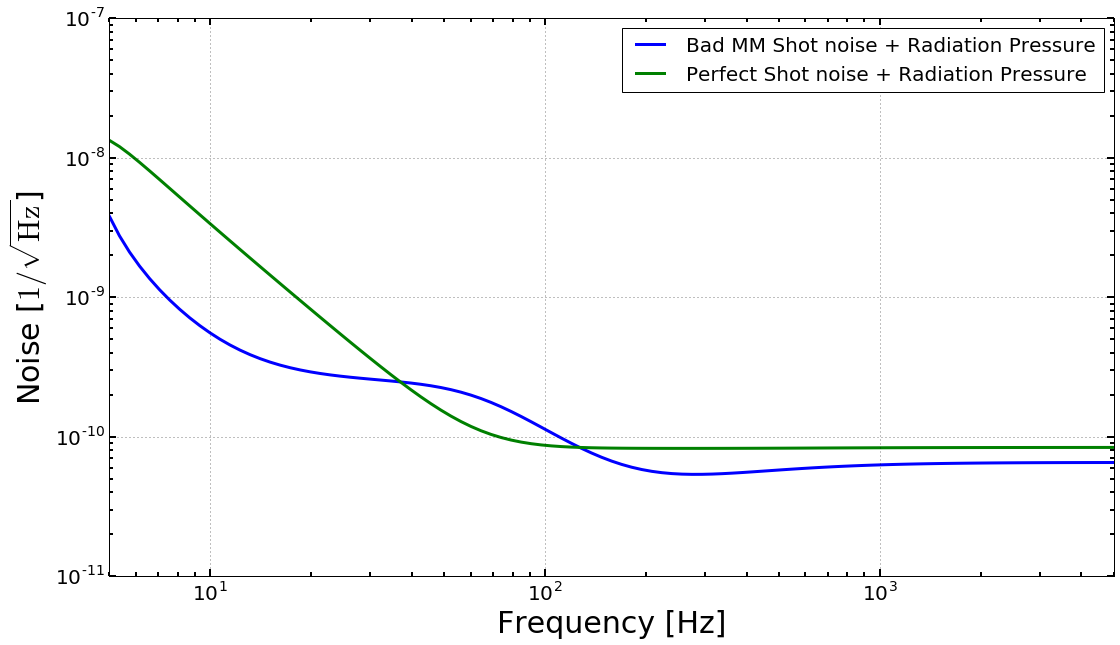

In [40]:
pl.figure(figsize=(18, 10), dpi=80)

pl.subplot(111)
pl.loglog(freq[0], np.real(out1['NSR_shot_rad']),linewidth=3, label='Bad MM Shot noise + Radiation Pressure')
pl.loglog(freq[0], np.real(out_perfect_mm['NSR_shot_rad']),linewidth=3,
          label='Perfect Shot noise + Radiation Pressure')

#pl.xlim(200,900)
#pl.ylim(7e-11,3e-10)
pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Noise [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

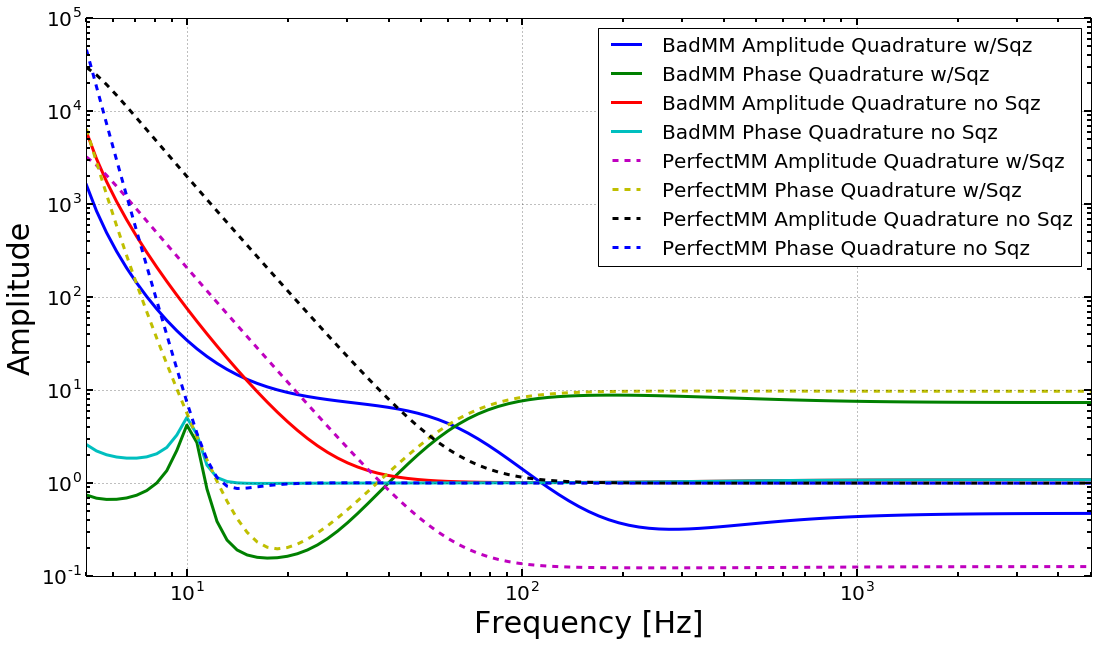

In [34]:
pl.figure(figsize=(18, 10), dpi=80)


pl.subplot(111)

pl.loglog(freq[0], np.real(out1['qdA']),linewidth=3,
          label='BadMM Amplitude Quadrature w/Sqz')
pl.loglog(freq[0], np.real(out1['qdP']),linewidth=3,
          label='BadMM Phase Quadrature w/Sqz')

pl.loglog(freq[0], np.real(out_w_badMM_noSqz['qdA']),linewidth=3,
          label='BadMM Amplitude Quadrature no Sqz')
pl.loglog(freq[0], np.real(out_w_badMM_noSqz['qdP']),linewidth=3,
          label='BadMM Phase Quadrature no Sqz')

pl.loglog(freq[0], np.real(out_perfect_mm['qdA']),'--',linewidth=3,
          label='PerfectMM Amplitude Quadrature w/Sqz')
pl.loglog(freq[0], np.real(out_perfect_mm['qdP']),'--',linewidth=3,
          label='PerfectMM Phase Quadrature w/Sqz')

pl.loglog(freq[0], np.real(out_perfect_mm_noSqz['qdA']),'--',linewidth=3
          , label='PerfectMM Amplitude Quadrature no Sqz')
pl.loglog(freq[0], np.real(out_perfect_mm_noSqz['qdP']),'--',linewidth=3,
          label='PerfectMM Phase Quadrature no Sqz')

pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Amplitude",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

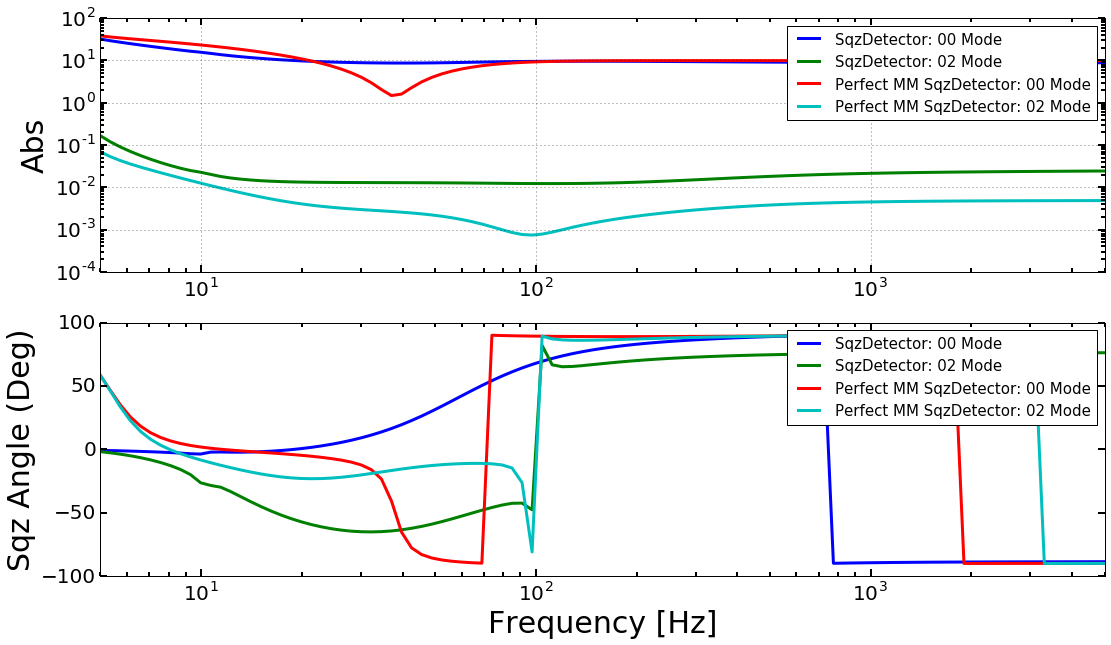

In [35]:
pl.figure(figsize=(18, 10), dpi=80)

pl.subplot(211)
pl.loglog(freq[0], np.absolute(out1['sd00']),linewidth=3, label='SqzDetector: 00 Mode')
pl.loglog(freq[0], np.absolute(out1['sd02']),linewidth=3, label='SqzDetector: 02 Mode')
#pl.loglog(freq[0], np.absolute(out1['sd04']),linewidth=3, label='SqzDetector: 04 Mode')

pl.loglog(freq[0], np.absolute(out_perfect_mm['sd00']),linewidth=3, label='Perfect MM SqzDetector: 00 Mode')
pl.loglog(freq[0], np.absolute(out_perfect_mm['sd02']),linewidth=3, label='Perfect MM SqzDetector: 02 Mode')
#pl.loglog(freq[0], np.absolute(out_perfect_mm['sd04']),linewidth=3, label='Perfect MM SqzDetector: 04 Mode')


###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.ylabel("Abs",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=15)

pl.subplot(212)
pl.semilogx(freq[0], np.angle(out1['sd00'],deg=True),linewidth=3, label='SqzDetector: 00 Mode')
pl.semilogx(freq[0], np.angle(out1['sd02'],deg=True),linewidth=3, label='SqzDetector: 02 Mode')
#pl.semilogx(freq[0], np.angle(out1['sd04'],deg=True),linewidth=3, label='SqzDetector: 024 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['sd00'],deg=True),linewidth=3, label='Perfect MM SqzDetector: 00 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['sd02'],deg=True),linewidth=3, label='Perfect MM SqzDetector: 02 Mode')
#pl.semilogx(freq[0], np.angle(out_perfect_mm['sd04'],deg=True),linewidth=3, label='Perfect MM SqzDetector: 04 Mode')

###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Sqz Angle (Deg)",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.legend(fontsize=15)

pl.show()

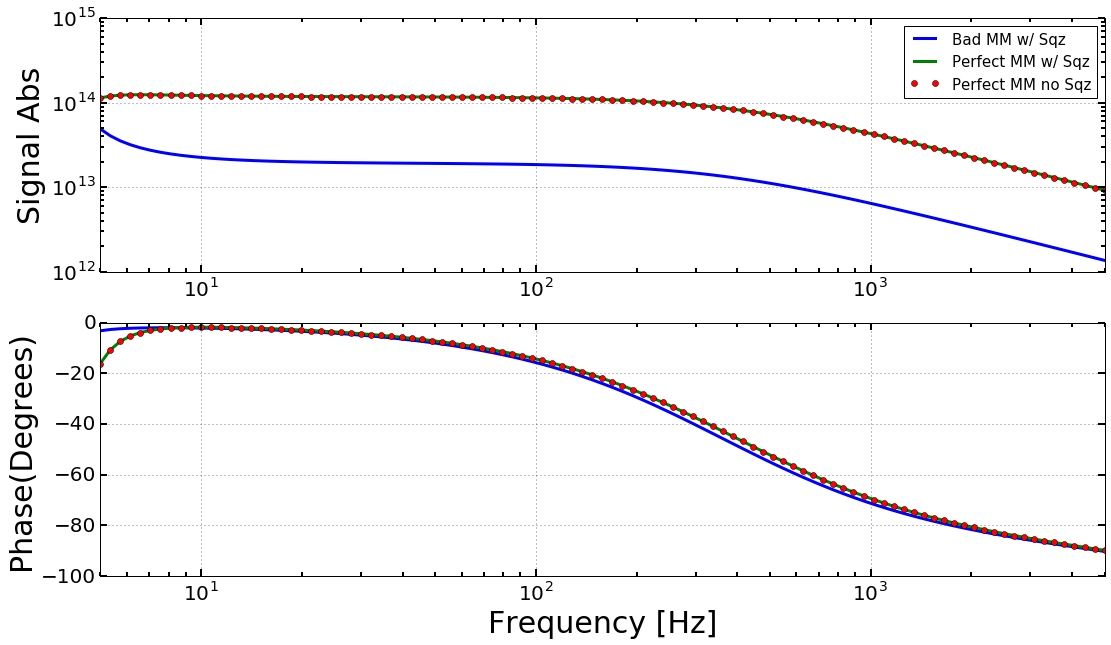

In [36]:
pl.figure(figsize=(18, 10), dpi=80)


pl.subplot(211)
pl.loglog(freq[0], np.absolute(out1['signal']),linewidth=3, label='Bad MM w/ Sqz')
pl.loglog(freq[0], np.absolute(out_perfect_mm['signal']),linewidth=3, label='Perfect MM w/ Sqz')
pl.loglog(freq[0], np.absolute(out_perfect_mm_noSqz['signal']),'o',linewidth=3, label='Perfect MM no Sqz')

###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.ylabel("Signal Abs",fontsize=30)
pl.legend(fontsize=15)


pl.subplot(212)
pl.semilogx(freq[0], np.angle(out1['signal'],deg=True),linewidth=3, label='Signal')
pl.semilogx(freq[0], np.angle(out_perfect_mm['signal'],deg=True),linewidth=3, label='Signal')
pl.semilogx(freq[0], np.angle(out_perfect_mm_noSqz['signal'],deg=True),'o',linewidth=3,label='Signal')


pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Phase(Degrees)",fontsize=30)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()

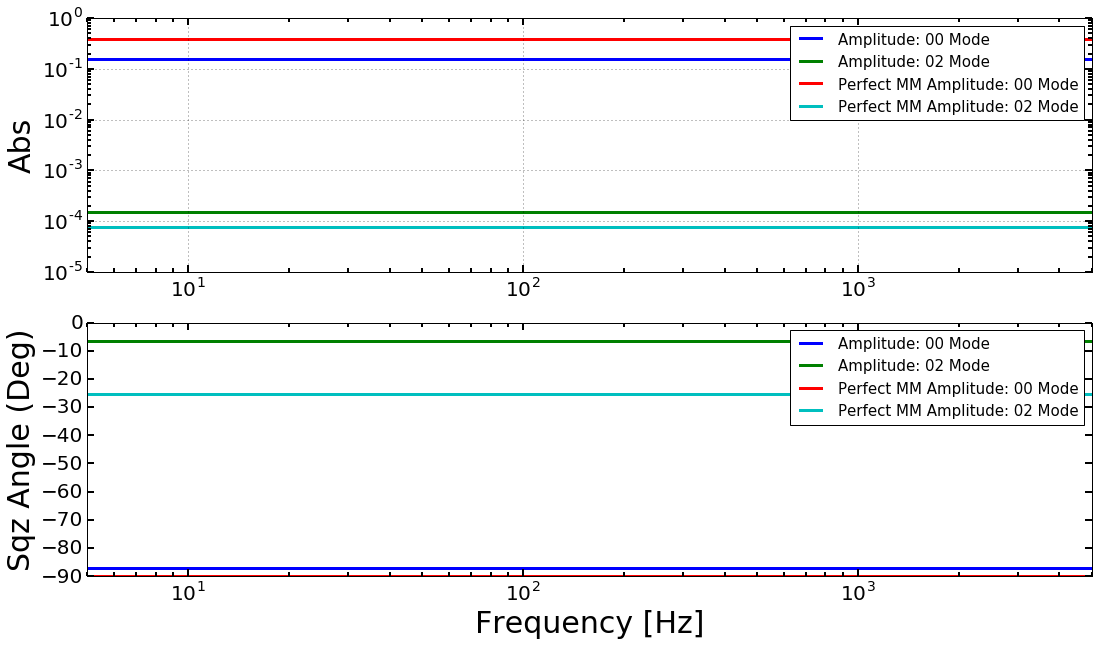

In [37]:
pl.figure(figsize=(18, 10), dpi=80)

pl.subplot(211)
pl.loglog(freq[0], np.absolute(out1['OMCoutTEM00']),linewidth=3, label='Amplitude: 00 Mode')
pl.loglog(freq[0], np.absolute(out1['OMCoutTEM02']),linewidth=3, label='Amplitude: 02 Mode')
#pl.loglog(freq[0], np.absolute(out1['OMCoutTEM04']),linewidth=3, label='Amplitude: 04 Mode')

pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM00']),linewidth=3,
          label='Perfect MM Amplitude: 00 Mode')
pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM02']),linewidth=3,
          label='Perfect MM Amplitude: 02 Mode')
#pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM04']),linewidth=3,
#          label='Perfect MM Amplitude: 04 Mode')


###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.ylabel("Abs",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=15)

pl.subplot(212)
pl.semilogx(freq[0], np.angle(out1['OMCoutTEM00'],deg=True),linewidth=3,
            label='Amplitude: 00 Mode')
pl.semilogx(freq[0], np.angle(out1['OMCoutTEM02'],deg=True),linewidth=3,
            label='Amplitude: 02 Mode')
#pl.semilogx(freq[0], np.angle(out1['OMCoutTEM04'],deg=True),linewidth=3,
#            label='Amplitude: 024 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM00'],deg=True),linewidth=3,
            label='Perfect MM Amplitude: 00 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM02'],deg=True),linewidth=3,
            label='Perfect MM Amplitude: 02 Mode')
#pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM04'],deg=True),linewidth=3,
#            label='Perfect MM Amplitude: 04 Mode')

###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Sqz Angle (Deg)",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.legend(fontsize=15)

pl.show()

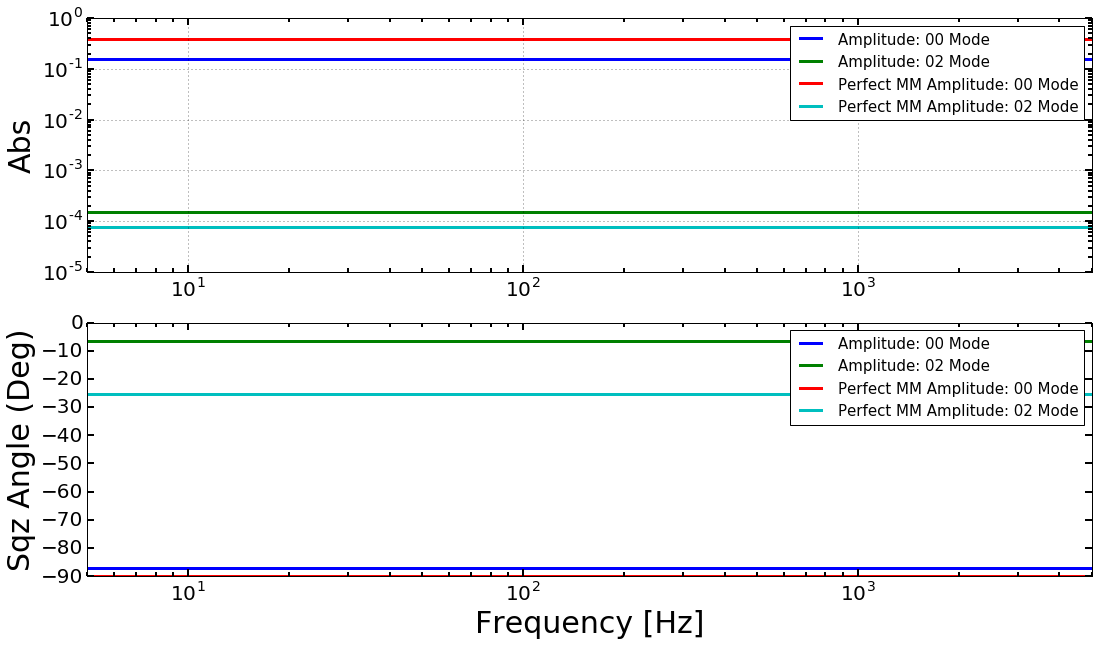

In [38]:
pl.figure(figsize=(18, 10), dpi=80)

pl.subplot(211)
pl.loglog(freq[0], np.absolute(out1['OMCoutTEM00']),linewidth=3, label='Amplitude: 00 Mode')
pl.loglog(freq[0], np.absolute(out1['OMCoutTEM02']),linewidth=3, label='Amplitude: 02 Mode')
#pl.loglog(freq[0], np.absolute(out1['OMCoutTEM04']),linewidth=3, label='Amplitude: 04 Mode')

pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM00']),linewidth=3,
          label='Perfect MM Amplitude: 00 Mode')
pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM02']),linewidth=3,
          label='Perfect MM Amplitude: 02 Mode')
#pl.loglog(freq[0], np.absolute(out_perfect_mm['OMCoutTEM04']),linewidth=3,
#          label='Perfect MM Amplitude: 04 Mode')


###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.ylabel("Abs",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=15)

pl.subplot(212)
pl.semilogx(freq[0], np.angle(out1['OMCoutTEM00'],deg=True),linewidth=3,
            label='Amplitude: 00 Mode')
pl.semilogx(freq[0], np.angle(out1['OMCoutTEM02'],deg=True),linewidth=3,
            label='Amplitude: 02 Mode')
#pl.semilogx(freq[0], np.angle(out1['OMCoutTEM04'],deg=True),linewidth=3,
#            label='Amplitude: 024 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM00'],deg=True),linewidth=3,
            label='Perfect MM Amplitude: 00 Mode')
pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM02'],deg=True),linewidth=3,
            label='Perfect MM Amplitude: 02 Mode')
#pl.semilogx(freq[0], np.angle(out_perfect_mm['OMCoutTEM04'],deg=True),linewidth=3,
#            label='Perfect MM Amplitude: 04 Mode')

###Main plot formatting
pl.xlim(freq[0].min(),freq[0].max())
pl.xlabel("Frequency [Hz]",fontsize=30)
pl.ylabel("Sqz Angle (Deg)",fontsize=30)
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.legend(fontsize=15)

pl.show()